First, we need to import the libraries needed to have access to functions.py and various other libraries

In [5]:
import sys
import os

We append our to working path the ../src path, where functions.py lies

In [6]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)


/home/sdi1700187/MLCBAss1/Assignment-1


We import everything from functions.py. Also the first two line ensure that everytime we change something to functions.py, this change can be "seen" here


In [7]:

%load_ext autoreload
%autoreload 2

from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We use pandas read_csv to import the two datasets and we get a rough idea about how many columns and rows (entries) each has

In [8]:
# we load the two datasets
dev_set_df=pd.read_csv("../data/assignment1_dev_set.csv")
val_set_df=pd.read_csv("../data/assignment1_val_set.csv")

print(f"Development set has {dev_set_df.shape[0]} rows and {dev_set_df.shape[1]} columns")
print(f"Validation set has {val_set_df.shape[0]} rows and {val_set_df.shape[1]} columns")

Development set has 489 rows and 141 columns
Validation set has 211 rows and 141 columns


We will get a rough idea about our data. We will check whether they are normally distributed and we will find their mean, standard deviation, maximum and minimun value. This will help us decide whather there outliers in our data. If there are, we will have to take that into consideration, along with the presence or lack thereof normality

--> BMI <--
 Mean:24.939550102249488 
 Standard deviation: 4.20340569413587
 Max:67.26 
 Min:16.97


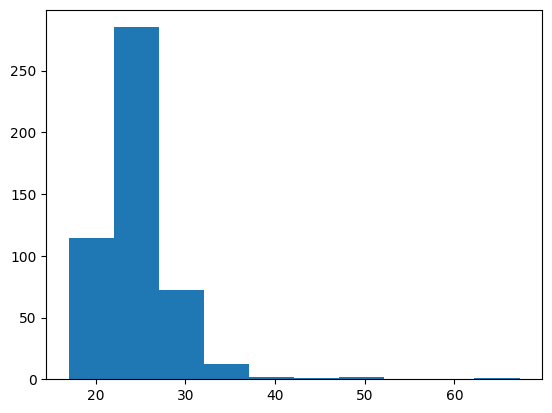

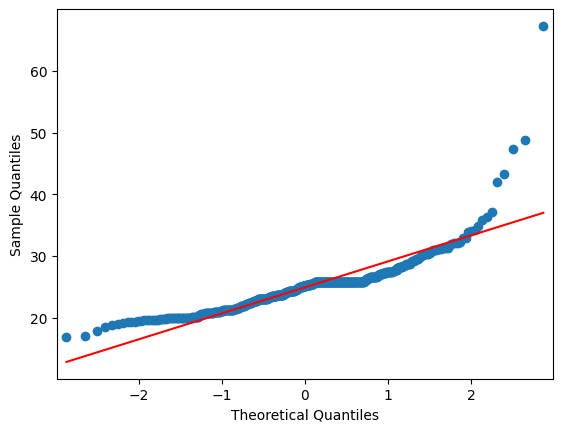

BMI Sample does NOT look Gaussian (reject H0)
--> Age <--
 Mean:46.70349693251534 
 Standard deviation: 15.712140690309404
 Max:81.0 
 Min:19.0


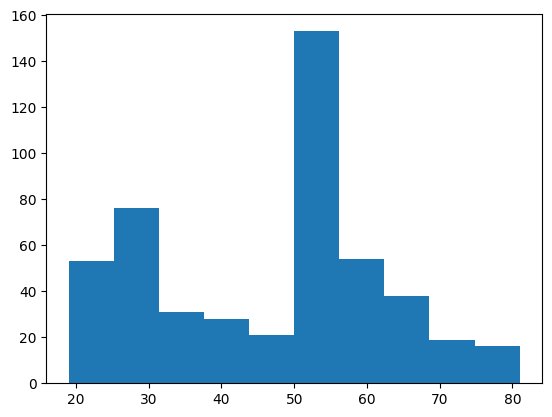

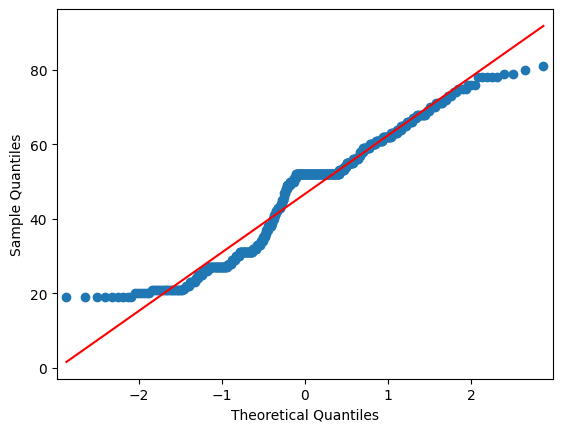

Age Sample does NOT look Gaussian (reject H0)
--> Acholeplasma axanthum <--
 Mean:0.016817549934560326 
 Standard deviation: 0.14488624700099778
 Max:2.8613 
 Min:0.0
Acholeplasma axanthum Sample does NOT look Gaussian (reject H0)
--> Acidaminococcus fermentans <--
 Mean:0.02996819137627812 
 Standard deviation: 0.1976132886169909
 Max:2.62282 
 Min:0.0
Acidaminococcus fermentans Sample does NOT look Gaussian (reject H0)
--> Acidaminococcus intestini <--
 Mean:0.29491706878527607 
 Standard deviation: 0.8038805822703393
 Max:7.66035 
 Min:0.0
Acidaminococcus intestini Sample does NOT look Gaussian (reject H0)
--> Actinomyces lingnae <--
 Mean:0.0016084064601226994 
 Standard deviation: 0.010420291136182942
 Max:0.206426 
 Min:0.0
Actinomyces lingnae Sample does NOT look Gaussian (reject H0)
--> Akkermansia muciniphila <--
 Mean:1.5559141719182004 
 Standard deviation: 4.302133170058591
 Max:38.8349 
 Min:0.0
Akkermansia muciniphila Sample does NOT look Gaussian (reject H0)
--> Alistipe

In [9]:
bmi=dev_set_df["BMI"]
age=dev_set_df["Host age"]
bacteria=get_bacteria(dev_set_df)

bacteria_names=bacteria.columns

normality_dict={}
mean_dict={}
std_dict={}
max_dict={}
min_dict={}
# we will get a general idea of our data
# starting with the BMI
mean_dict["BMI"],std_dict["BMI"],max_dict["BMI"],min_dict["BMI"]=rough_idea(bmi,"BMI")

# we will check the normality of the bmi
# first, we will get a rough idead visually
plot_for_normality(bmi)

# next we check properly, using the shapiro-wilk test for normality, with our null hypothesis being that the bmi data follow the normal distribution
# normality test
normality_dict["BMI"]=check_for_normality(bmi,"BMI")

# next, we move on to age
mean_dict["Age"],std_dict["Age"],max_dict["Age"],min_dict["Age"]=rough_idea(age,"Age")

# we will check the normality of the age
# first, we will get a rough idead visually
plot_for_normality(age)

# next we check properly, using the shapiro-wilk test for normality, with our null hypothesis being that the age data follow the normal distribution
# normality test
normality_dict["Age"]=check_for_normality(age,"Age")

# next, we move on to the bacteria
for bact in bacteria_names:
    bacterium=bacteria[bact]
    mean_dict[bact],std_dict[bact],max_dict[bact],min_dict[bact]=rough_idea(bacterium,bact)
    # plot_for_normality(bacterium) # plotting takes time and it's just more of a visual hint. we comment it for speed
    normality_dict[bact]=check_for_normality(bacterium,bact)

normal_columns=[]
non_normal_columns=[]

print_dict(normality_dict,mode="Normal")

normal_columns,non_normal_columns=find_normal(normality_dict)
print(f"There are {len(non_normal_columns)} NON NORMAL columns\n")

if(len(non_normal_columns)>0):
    print("These are:")
    for non_norm in non_normal_columns:
        print(non_norm)

print(f"There are {len(normal_columns)} NORMAL columns\n")

if(len(normal_columns)>0):
    print("These are:")
    for norm in normal_columns:
        print(norm)

print_dict(mean_dict,mode="Mean")
print_dict(std_dict,mode="Std")
print_dict(max_dict,mode="Max")
print_dict(min_dict,mode="Min")

We discovered that our data are NOT normally distributed and that they have outliers (judging by the very high values of some low meaned bacteria). Nothing to worry about, we just have to take it into account when performing the scaling and the selection of the models. However, chances are that simple linear models won't work well

We move on to check the correlation between BMI and each of the other features(Age,Sex,Bacteria). We want to see if there are some features that are strongly correlated with BMI. If there are, then maybe we could just focus on them and ignore a great deal of the other features

Pearson's correlation of Age and BMI is 0.27286164850871103
Pearson's correlation of Eubacterium sulci and BMI is 0.2682078424731502
Pearson's correlation of Clostridium symbiosum and BMI is 0.12577786513567668
Pearson's correlation of Eubacterium dolichum and BMI is 0.09574598561423193
Pearson's correlation of Clostridium propionicum and BMI is 0.09380472872411152
Pearson's correlation of Clostridium colinum and BMI is 0.08781076513215254
Pearson's correlation of Desulfovibrio desulfuricans and BMI is 0.08763729474665981
Pearson's correlation of Bifidobacterium saguini and BMI is 0.08583797136528015
Pearson's correlation of Clostridium asparagiforme and BMI is 0.08490579078800427
Pearson's correlation of Flavonifractor plautii and BMI is 0.0784463594634354
Pearson's correlation of Clostridium bolteae and BMI is 0.05676541040373776
Pearson's correlation of Holdemanella biformis and BMI is 0.055892558603977814
Pearson's correlation of Collinsella aerofaciens and BMI is 0.054620083695701

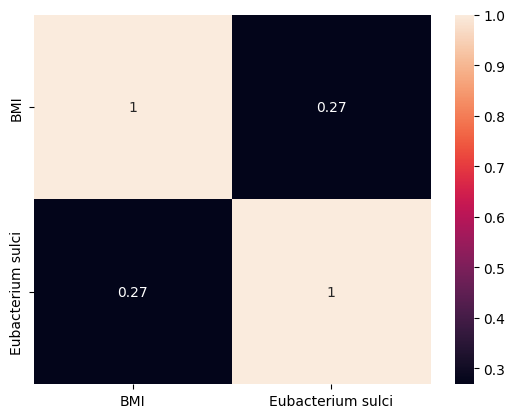

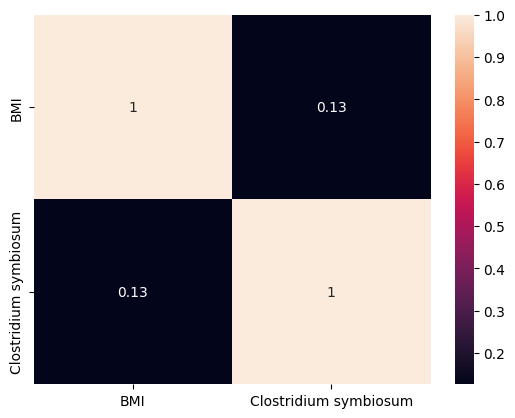

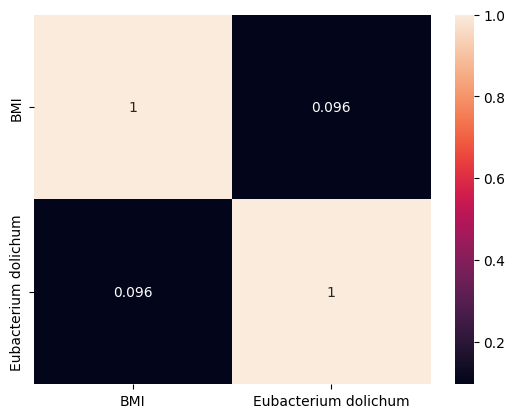

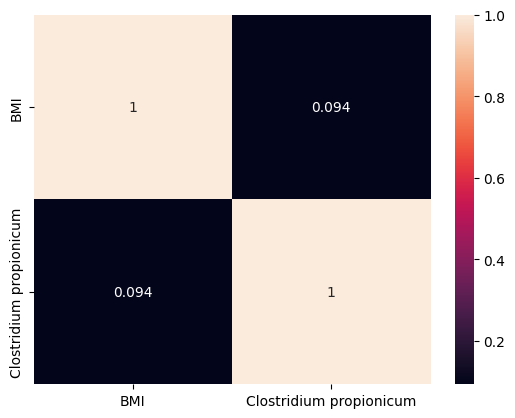

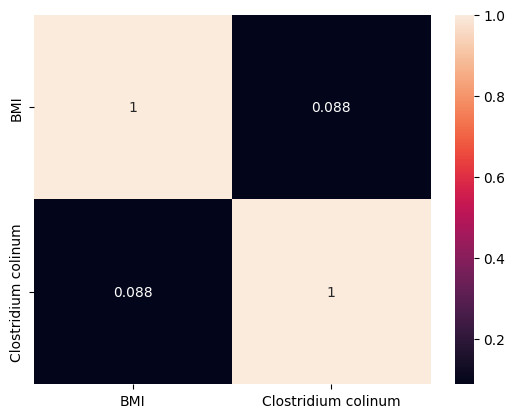

In [10]:
# check correlations
sex=dev_set_df["Sex"]
sex_encoded=sex.apply(encode_sex)

corr_dict={} # dictionairy for the correlation between features and BMI
# we check the correlation between BMI and sex
sex_corr=stats.pearsonr(bmi,sex_encoded)
corr_dict["Sex"]=sex_corr

# we check the correlation between BMI and age
age_corr=stats.pearsonr(bmi,age)
corr_dict["Age"]=age_corr

# we check the correlation between BMI and each bacterium
for bact in bacteria_names:
    bact_corr=stats.pearsonr(bmi,bacteria[bact])
    corr_dict[bact]=bact_corr

corr_dict=dict(sorted(corr_dict.items(), key=lambda item: item[1],reverse=True))
print_dict(corr_dict,mode="Corr")

bact_dict=remove_key(corr_dict,"Age")
bact_dict=remove_key(bact_dict,"Sex")
best_bact_names=list(bact_dict.keys()) # these are the names of the bacteria, ordered by descending value of Pearson's correlation

# We could plot the heatmaps for all the bacteria-BMI combos
# However, since we keep the bacteria ordered in regards to Pearson coeff. it would suffice to print just the best 5.
# If the correlation of those 5 is low, then the correlation of the others would be low as well.

for bact in best_bact_names[:5]:
    plot_bact_corr([bmi,bacteria[bact]])

We discovered that no feature, bacterial or otherwise, is strongly correlated to BMI. Once again this is not worrisome. Just an indication that the relatioship between microbiome and BMI is more complicated that it appears to be. However, one thing worth expecting, is a relatively high numberof features during the feature selection phase.

We move on with cleaning our data. For that purpose, we fill in any NA values with '0.0', we remove the duplicates and we encode the 'Sex' column to 0s and 1s (Male->0,Female->1)

In [11]:
# we clean the datasets
frames_dev=clean_data(dev_set_df)
frames_val=clean_data(val_set_df)

No duplicates in the set
No duplicates in the set


We found no duplicates, so we were able to keep all of the initial entries. Now, we will save our cleaned data. To do that we will drop these columns {'Unnamed: 0', 'Project ID','Experiment type','Disease MESH ID'}, while keeping 'BMI', 'Age','Sex' and everything bacterial. The scope of this assignment does not take into consideration age or sex, but we reckon that in a future work these will be relevant, as their correlation coefficients are among the highest (still low to be considered correlated however)

In [12]:
data_path=ass_path + "/data"

# we save the two clean datasets THAT ARE NOT SCALED YET
save_clean_data(frames=frames_dev,mode="Dev",data_path=data_path)
save_clean_data(frames=frames_val,mode="Eval",data_path=data_path)

Creating dataframe for the clean data...
The shape of the clean dataframe is: (489, 137)
Saving final clean data to: /home/sdi1700187/MLCBAss1/Assignment-1/data/development_final_data.csv
Saved the clean dataframe at: /home/sdi1700187/MLCBAss1/Assignment-1/data/development_final_data.csv
Creating dataframe for the clean data...
The shape of the clean dataframe is: (211, 137)
Saving final clean data to: /home/sdi1700187/MLCBAss1/Assignment-1/data/evaluation_final_data.csv
Saved the clean dataframe at: /home/sdi1700187/MLCBAss1/Assignment-1/data/evaluation_final_data.csv


The extra column in the new clean datasets is because of pandas that adds an 'Unnamed: 0' column. We will just have to work around it when we try scaling and predicting